!pip install graphviz

In [8]:
import pandas as pd
df  = pd.read_csv("data/data_prep.csv")
df.drop(columns=['student','lgain_pp', 'lgain_pe'], inplace=True)

In [9]:
df = df.apply(pd.to_numeric, errors='coerce')
# Remove rows with NaN values
df = df.dropna()

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carga el conjunto de datos
X = df.drop(columns=['take_exam'])
y = df.take_exam

In [11]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un clasificador de árbol de decisión con Árbol de decisión con Gini como criterio
clf = DecisionTreeClassifier(criterion='gini')

In [12]:
# Entrena el árbol de decisión
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: {:.2f}".format(accuracy))

# Calcular y mostrar la precisión por clase
precision = precision_score(y_test, y_pred)
print("Precisión por clase: {:.2f}".format(precision))

# Calcular y mostrar la exhaustividad/recall por clase
recall = recall_score(y_test, y_pred)
print("Exhaustividad/Recall por clase: {:.2f}".format(recall))

# Calcular y mostrar la puntuación F1 por clase
f1 = f1_score(y_test, y_pred)
print("Puntuación F1 por clase: {:.2f}".format(f1))

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión: 1.00
Precisión por clase: 1.00
Exhaustividad/Recall por clase: 1.00
Puntuación F1 por clase: 1.00

Informe de clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00       110

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127


Matriz de confusión:
[[ 17   0]
 [  0 110]]


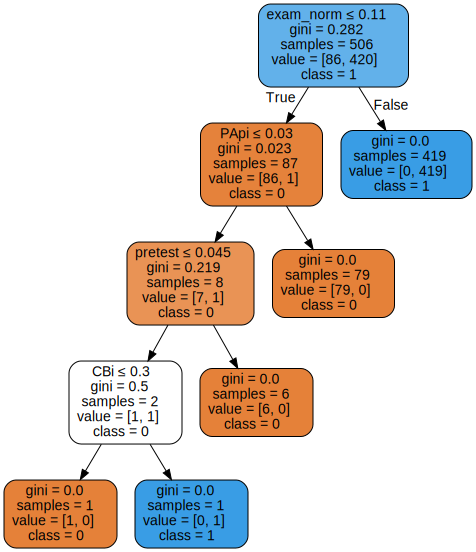

In [14]:
import graphviz
from sklearn.tree import export_graphviz

# Generar el gráfico del árbol de decisión
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=df.drop(columns=['take_exam']).columns,
                           class_names=["0", "1"],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear un objeto graphviz a partir del gráfico generado
graph = graphviz.Source(dot_data)

# Mostrar el gráfico del árbol de decisión
graph